In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import warnings warnings.filterwarnings("ignore")

In [ ]:
#linking the dataset in google grive to the google colab ipynb file
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


The Infant Health Development Program (IHDP) dataset was collected to investigate the effect of highquality childcare and home visits on the future cognitive test score of low-birth-weight, premature infants.
The dataset contains 25 features, including measurements about the child (e.g., child-birth weight, head
circumference, weeks born preterm, birth order, first born, neonatal health index, sex...) and information
about the mother at the time she gave birth (e.g., age, marital status, educational attainment, whether
she worked) and her behaviours during the pregnancy (e.g., whether she smoked cigarettes, drank alcohol,
took drugs...). These are background variables X. The treatment variable (t) indicates whether a family
was part of the control (i.e., t = 0, no support was provided) or the treatment (i.e., t = 1, support was
provided) group. The outcome column records the cognitive test score for the child. The dataset was
introduced in [1] based on a clinical trial [2]. We use a semi-synthetic version of the data, where the
outcomes (both factual and counterfactual) are simulated (with some added random noise) based on real
pre-treatment covariates. For this reason, the dataset also includes true (noiseless) individualised effects
per each data unit, which are better suited for performance evaluation than the outcomes due to lack of
noise. The use of counterfactuals/true effects is forbidden in the training stage (evaluation only).

In [ ]:
#reading the second dataset
data2 = pd.read_csv("/content/gdrive/MyDrive/Dataset/ihdp.csv")
data2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
#observing the shape and size of the dataset
data2.shape

(747, 29)

In [ ]:
data2.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,0.269076,0.219545,0.358768,0.463186,0.140562,0.959839,0.594378,0.963855,0.135207,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,0.443777,0.414216,0.479960,0.498977,0.347802,0.196467,0.491341,0.186775,0.342174,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [ ]:
# as is seen above, all the columns have data type float64. but for exploring and analysis, the numeric values should be in integer form
data = data2.astype(int)

In [ ]:
for i in data.columns:
  print("The unique values in", i, "are:", data[i].unique(),"\n")

The unique values in x1 are: [ 1  0 -1 -2] 

The unique values in x2 are: [ 0  1 -1 -2 -3  2] 

The unique values in x3 are: [-1  0  2  1] 

The unique values in x4 are: [0 1 2] 

The unique values in x5 are: [ 0 -1 -5  1 -2  2 -3 -4] 

The unique values in x6 are: [-1  1  0  2] 

The unique values in x7 are: [1 0] 

The unique values in x8 are: [0 1] 

The unique values in x9 are: [0 1] 

The unique values in x10 are: [0 1] 

The unique values in x11 are: [1 0] 

The unique values in x12 are: [0 1] 

The unique values in x13 are: [1 0] 

The unique values in x14 are: [1 0] 

The unique values in x15 are: [0 1] 

The unique values in x16 are: [0 1] 

The unique values in x17 are: [1 0] 

The unique values in x18 are: [1 0] 

The unique values in x19 are: [0 1] 

The unique values in x20 are: [0 1] 

The unique values in x21 are: [0 1] 

The unique values in x22 are: [0 1] 

The unique values in x23 are: [0 1] 

The unique values in x24 are: [0 1] 

The unique values in x25 are: [1 0] 


In [ ]:
X=data2
X=X.drop('ite', axis=1)

In [ ]:
Y=data2['ite']

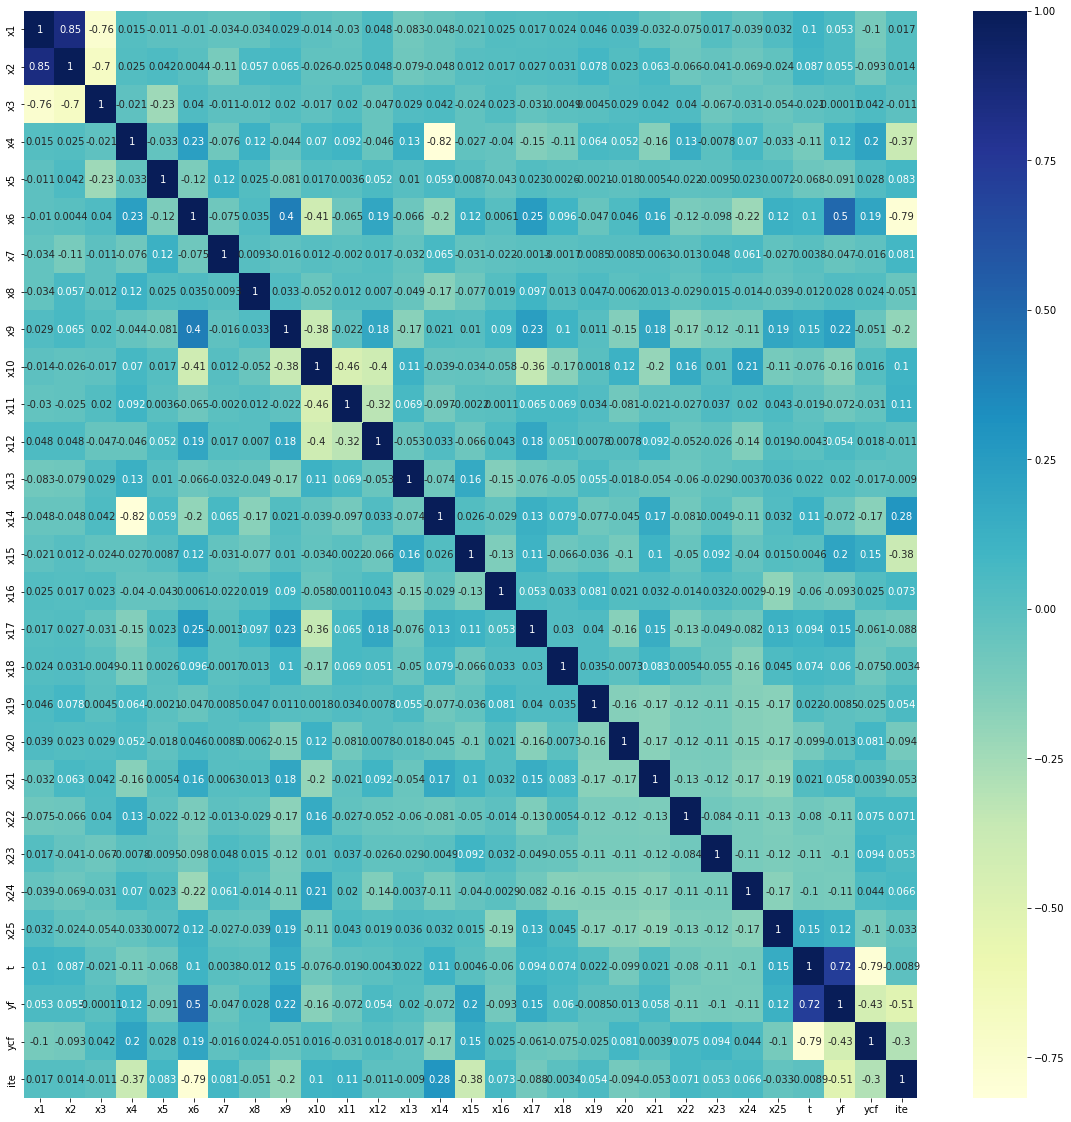

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(data2.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data2, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.model_selection import train_test_split

In [ ]:
# Rescaling the Features
# We will use MinMax scaling.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['x1', 'x2', 'x3', 'x4', 'x5','x6','yf','ycf','ite']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [ ]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('ite')
X_train = df_train

In [ ]:
## Step 5: Building a linear model


import statsmodels.api as sm

In [ ]:

# Add a constant - because T had highest corelation with the target variable
X_train_lm = sm.add_constant(X_train[['x14']])


In [ ]:

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained

lr.params

const    0.862116
x14      0.078508
dtype: float64

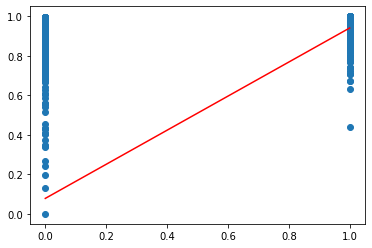

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.078508 + 0.862116*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    ite   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.01e-10
Time:                        05:54:25   Log-Likelihood:                 305.12
No. Observations:                 522   AIC:                            -606.2
Df Residuals:                     520   BIC:                            -597.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8621      0.008    108.272      0.0

The R-squared value obtained is `0.077`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `x11`.


In [ ]:
# Assign all the feature variables to X
X_train_lm = X_train[['x14', 'x11']]


In [ ]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.844244
x14      0.082599
x11      0.062013
dtype: float64

In [ ]:
# Check the summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    ite   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     33.56
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.96e-14
Time:                        05:56:02   Log-Likelihood:                 315.86
No. Observations:                 522   AIC:                            -625.7
Df Residuals:                     519   BIC:                            -612.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8442      0.009     97.088      0.0


We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.115` from `0.07`.
Let's go ahead and add another variable, in the order of co relation with the target variable ite

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 
It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $